In [1]:
import torch
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Display contour plot of f at all points (x[i],y[j])
def contour_plot1(x,y,f,n_levels):
    xx, yy = np.meshgrid(x, y)
    p=np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])
    X=torch.tensor(p,dtype=torch.float32)
    fp=f(X)
    z=fp.reshape(xx.shape).detach().numpy()
    plt.contourf(x,y,z,n_levels,cmap='gray')


200 0.5825915336608887
400 0.4819476008415222
600 0.41493847966194153
800 0.36679762601852417
1000 0.33018699288368225
1200 0.3012442886829376
1400 0.2777356207370758
1600 0.2582530677318573
1800 0.2418500781059265
2000 0.22785842418670654
2200 0.2157907336950302
2400 0.2052815556526184
2600 0.19605104625225067
2800 0.187882199883461
3000 0.1806032508611679
3200 0.17407731711864471
3400 0.16819383203983307
3600 0.16286253929138184
3800 0.1580090969800949
4000 0.1535719931125641
4200 0.14949963986873627
4400 0.1457485407590866
4600 0.1422818899154663
4800 0.13906821608543396
5000 0.1360805779695511


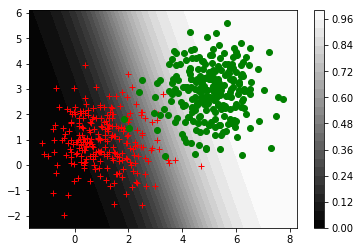

In [2]:
Xnp, ynp = make_blobs(n_samples=500, centers = [(1, 1), (5, 3)], n_features=2)

X=torch.tensor(Xnp,dtype=torch.float32)
y=torch.tensor(ynp[:,np.newaxis],dtype=torch.float32)

# Use the nn package to define a model as a sequence of layers. 
# nn.Sequential is a Module which contains other Modules, 
# and applies them in sequence to produce its output. 
# Each Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
    torch.nn.Sigmoid()
)

# Use Binary Cross Entropy as loss function.
loss_fn = torch.nn.BCELoss()

n_its=5000  # Number of iterations
learning_rate = 0.01
for t in range(n_its):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(X)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    if ((t+1)%200==0):  # Print every 200th result
        print(t+1, loss.item())

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
            
# Create a grid of points
px = np.arange(Xnp[:,0].min()-0.5, Xnp[:,0].max()+0.5, 0.01)
py = np.arange(Xnp[:,1].min()-0.5, Xnp[:,1].max()+0.5, 0.01)

# Use different colours for different classes
X0=Xnp[ynp==0] # Select samples for class 0
X1=Xnp[ynp==1] # Select samples for class 1
plt.plot(X0[:,0],X0[:,1],"+",color="red")
plt.plot(X1[:,0],X1[:,1],"o",color="green")
contour_plot1(px,py,model,30)
plt.colorbar()